In [1]:
import ast

from qdrant_client import QdrantClient

client = QdrantClient(url="http://localhost:6333")
client

TRANSFORMER

In [3]:
results = client.query_points(
    collection_name="open3_embeddings_8_seconds",
    query=2607,
    limit = 5 # <--- point id
)


In [7]:
retrieved_song = client.retrieve(
 collection_name="openl3_embeddings_8_seconds",
 ids=[2607],
 with_vectors=False
)
retrieved_song

[Record(id=2607, payload={'name': 'Thunderstorm for Relaxing Sleep, Pt. 47', 'artist': 'Sleepy Times', 'spotify_id': '4bVJHJ4CDyqrWlcTulUsmj', 'preview': 'https://p.scdn.co/mp3-preview/55a30bdd13a855a6c0d0da38275ff3c4d211d251?cid=50179b9e0a064ad09ffb159682151c22', 'img': 'https://i.scdn.co/image/ab67616d0000b2736a3bcc293884b9e5e3604519', 'danceability': 0.0627, 'energy': 0.4270000000000001, 'loudness': -33.081, 'speechiness': 0.0753, 'acousticness': 0.00139, 'instrumentalness': 0.888, 'liveness': 0.594, 'valence': 0.0303, 'acousticness_artist': 0.0007029, 'danceability_artist': 0.11135, 'energy_artist': 0.4320000000000001, 'instrumentalness_artist': 0.9325, 'liveness_artist': 0.494, 'speechiness_artist': 0.07425, 'valence_artist': 0.03235, 'artist_id': '2tZbAzQxbp2fvMbVR9glOT', 'genres': "['environmental', 'sleep']", 'first_genre': 'environmental', 'file_path': '../mp3songs/spotify_dataset_stratified_first_genre/Thunderstorm for Relaxing Sleep, Pt. 47.mp3'}, vector=None, shard_key=None

In [98]:
retrieved_song[0].payload

{'name': 'Thunderstorm for Relaxing Sleep, Pt. 47',
 'artist': 'Sleepy Times',
 'spotify_id': '4bVJHJ4CDyqrWlcTulUsmj',
 'preview': 'https://p.scdn.co/mp3-preview/55a30bdd13a855a6c0d0da38275ff3c4d211d251?cid=50179b9e0a064ad09ffb159682151c22',
 'img': 'https://i.scdn.co/image/ab67616d0000b2736a3bcc293884b9e5e3604519',
 'danceability': 0.0627,
 'energy': 0.4270000000000001,
 'loudness': -33.081,
 'speechiness': 0.0753,
 'acousticness': 0.00139,
 'instrumentalness': 0.888,
 'liveness': 0.594,
 'valence': 0.0303,
 'acousticness_artist': 0.0007029,
 'danceability_artist': 0.11135,
 'energy_artist': 0.4320000000000001,
 'instrumentalness_artist': 0.9325,
 'liveness_artist': 0.494,
 'speechiness_artist': 0.07425,
 'valence_artist': 0.03235,
 'artist_id': '2tZbAzQxbp2fvMbVR9glOT',
 'genres': "['environmental', 'sleep']",
 'first_genre': 'environmental',
 'file_path': '../mp3songs/spotify_dataset_stratified_first_genre/Thunderstorm for Relaxing Sleep, Pt. 47.mp3'}

In [99]:
relevant_results = [point for point in results.points if point.payload['first_genre'] == retrieved_song[0].payload['first_genre']]
len(relevant_results)

4

In [3]:
import pandas as pd

df = pd.read_csv('spotify_songs_stratified_first_genre_with_paths_with_embeddings.csv')
df

,name,artist,spotify_id,preview,img,danceability,energy,loudness,speechiness,acousticness,...,speechiness_artist,valence_artist,artist_id,genres,first_genre,file_path,transformer_embeddings_30_seconds,openl3_embeddings_8_seconds,PANNs_embeddings_8_seconds,VGG_embeddings_8_seconds
0,Silver Spoon,BTS,2VgPA0WnwvE2nbltxa3BHz,https://p.scdn.co/mp3-preview/f55c1c89d0ddd143...,https://i.scdn.co/image/ab67616d0000b273ad7586...,0.649,0.875,-2.880,0.0696,0.00128,...,0.128515,0.533369,3Nrfpe0tUJi4K4DXYWgMUX,"['k-pop', 'k-pop boy group', 'pop']",k-pop,../mp3songs/spotify_dataset_stratified_first_g...,[[ 3.61000329e-01 -2.34038651e-01 1.01743065e...,[2.4387422 2.376852 3.2906168 2.6019742 2...,[0. 0. 0. ... 0.037940...,[-1.1046329 -0.27339408 0.13415912 ... -1.11...
1,My Texas (feat. Pat Green),Josh Abbott Band,0K2R5ECfzYqSyBLHXywRo5,https://p.scdn.co/mp3-preview/9c18379cdc5cc5ab...,https://i.scdn.co/image/ab67616d0000b273cc3825...,0.516,0.765,-5.822,0.0430,0.09230,...,0.034467,0.418111,2EJ5MRZCzpHSSNNEpTx9Kb,"['classic texas country', 'red dirt', 'texas c...",classic texas country,../mp3songs/spotify_dataset_stratified_first_g...,[[ 3.47680688e-01 -7.16578141e-02 1.37743592e...,[2.1619353 2.324805 2.860387 2.4442465 2...,[0. 0. 0. ... 0.014437...,[-0.2232785 -0.17925674 0.04539108 ... -0.75...
2,Another Used To Be,Joe,6o9ByOXt8s8vyPfiTKds0t,https://p.scdn.co/mp3-preview/1dee6720e9c99d27...,https://i.scdn.co/image/ab67616d0000b273be7ff5...,0.633,0.534,-7.844,0.0272,0.14100,...,0.062300,0.845000,3zTOe1BtyTkwNvYZOxXktX,"['contemporary r&b', 'r&b', 'urban contemporary']",contemporary r&b,../mp3songs/spotify_dataset_stratified_first_g...,[[ 4.36718255e-01 -1.75426811e-01 1.15717284e...,[2.3046193 2.3228045 3.0885825 2.1147604 1...,[0. 0. 0. ... 0.033671...,[-0.60732317 -0.07838741 0.2913144 ... -0.77...
3,I Follow Rivers - The Magician Remix,Lykke Li,4Jv7lweGIUOFQ7Oq2AtAh9,https://p.scdn.co/mp3-preview/154f0d5ccb26b95f...,https://i.scdn.co/image/ab67616d0000b2734511aa...,0.786,0.696,-5.796,0.0428,0.02340,...,0.045447,0.488706,6oBm8HB0yfrIc9IHbxs6in,"['art pop', 'electropop', 'indietronica', 'neo...",art pop,../mp3songs/spotify_dataset_stratified_first_g...,[[ 3.11004490e-01 -1.09873176e-01 4.37679321e...,[2.218338 2.335708 3.3483431 2.3983216 1...,[0. 0. 0. ... 0.011527...,[-0.6233872 0.07690017 0.24025749 ... -0.80...
4,No me importa nada,Luz Casal,77eDrs7w2utSdbBdpbefol,https://p.scdn.co/mp3-preview/409026af47f1bbb3...,https://i.scdn.co/image/ab67616d0000b2730dee6d...,0.564,0.804,-4.848,0.0394,0.44700,...,0.031600,0.463000,1HUbv0v2f9HNE6qIbB35El,"['cantautor', 'spanish new wave', 'spanish pop']",cantautor,../mp3songs/spotify_dataset_stratified_first_g...,[[ 3.55150104e-01 3.98102552e-02 1.84187740e...,[2.3324142 2.2169247 2.9813483 2.1433494 1...,[0. 0. 0. ... 0.026165...,[-1.4601393 -0.02582669 0.05545121 ... -1.18...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310,Lobo-hombre en París,La Unión,3M1H1CWjrSq7nxABHc8EXv,https://p.scdn.co/mp3-preview/96dcdeca3d7c5597...,https://i.scdn.co/image/ab67616d0000b27308aef4...,0.637,0.950,-7.547,0.0736,0.03880,...,0.066933,0.591000,2Ax9wZpdlg4r2zkc3pcI8U,"['cantautor', 'latin alternative', 'latin rock...",cantautor,../mp3songs/spotify_dataset_stratified_first_g...,[[ 2.90604204e-01 -1.45674586e-01 1.98311433e...,[2.1786263 2.576033 3.0471709 2.4521713 1...,[0. 0. 0. ... 0. 0. 0.],[-0.8308222 0.2067153 -0.0900839 ... -0.81...
4311,Passenger Seat (Acoustic),Stephen Speaks,61sJQh19AcTBrX7P8LWLi0,https://p.scdn.co/mp3-preview/6d01e37b5861028c...,https://i.scdn.co/image/ab67616d0000b2734f9efc...,0.549,0.437,-8.640,0.0313,0.68300,...,0.029733,0.635500,0AvtzKTYleNqdJXoZasQWG,['opm'],opm,../mp3songs/spotify_dataset_stratified_first_g...,[[ 4.47302788e-01 -1.87589258e-01 1.48096085e...,[2.321853 2.4470782 2.4758039 2.5271244 1...,[0. 0.0103219 0. ... 0.008316...,[-0.6114397 -0.06567439 0.27555102 ... -0.39...
4312,I Don't Know You,The Marías,4cJOLN346rtOty3UPACsao,ht

In [17]:
import pandas as pd
from tqdm import tqdm
from qdrant_client import QdrantClient

# Initialize the Qdrant client
client = QdrantClient(url="http://localhost:6333")

# Load the DataFrame
df = pd.read_csv('test_df_EDM.csv')

# Number of top results to evaluate
k = 10

# Define a function to calculate precision at k
def calculate_precision_at_k(results, first_genre, k):
    relevant_results = [point for point in results.points if point.payload['genres'] == first_genre]
    return len(relevant_results) / k

# Add new columns to store precision values for each collection
collections = [
    'base_11_genres_EDM_with_vggish_model','fine_tuned_11_genres_EDM_with_val_softmax_vggish_model_batch_size_1'
]


for collection in collections:
    df[f'precision_at_k_{collection}'] = 0.0

# Dictionary to store precision values for each genre and collection
genre_precisions = {collection: {} for collection in collections}

# Iterate over each row in the DataFrame
for index in tqdm(range(len(df)), desc="Processing songs"):
    first_genre = df.loc[index, 'genres']

    for collection in collections:
        response = client.query_points(
            collection_name=collection,
            query=index,
            limit=k
        )
        precision = calculate_precision_at_k(response, first_genre, k)

        # Append precision to the DataFrame
        df.at[index, f'precision_at_k_{collection}'] = precision

        if first_genre not in genre_precisions[collection]:
            genre_precisions[collection][first_genre] = []
        genre_precisions[collection][first_genre].append(precision)

# Calculate average precision for each genre and collection
average_precisions = {
    collection: {genre: sum(precisions) / len(precisions) for genre, precisions in genre_precisions[collection].items()}
    for collection in collections
}

# Calculate overall precision for each collection
overall_precisions = {
    collection: sum([sum(precisions) for precisions in genre_precisions[collection].values()]) / sum([len(precisions) for precisions in genre_precisions[collection].values()])
    for collection in collections
}

# Print the average precision for each genre and collection
for collection in collections:
    print(f"Collection: {collection}")
    for genre, avg_precision in average_precisions[collection].items():
        print(f"  Genre: {genre}, Average Precision@{k}: {avg_precision}")

# Print the overall precision for each collection
for collection, overall_precision in overall_precisions.items():
    print(f"Overall Average Precision@{k} for {collection}: {overall_precision}")

# Create a new DataFrame from genre_precisions
evaluation_scores = []
for collection in collections:
    for genre, precisions in genre_precisions[collection].items():
        for precision in precisions:
            evaluation_scores.append({
                'collection': collection,
                'genre': genre,
                'precision': precision
            })

evaluation_scores_df = pd.DataFrame(evaluation_scores)

Processing songs: 100%|██████████| 110/110 [00:01<00:00, 77.14it/s]

Collection: base_11_genres_EDM_with_vggish_model
  Genre: acid_techno, Average Precision@10: 0.18
  Genre: hardstyle, Average Precision@10: 0.09
  Genre: 90s_house, Average Precision@10: 0.27
  Genre: techno, Average Precision@10: 0.17
  Genre: jump_up_dnb, Average Precision@10: 0.27999999999999997
  Genre: groove_techno, Average Precision@10: 0.43
  Genre: schranz, Average Precision@10: 0.51
  Genre: liquid_dnb, Average Precision@10: 0.37
  Genre: neurofunk_dnb, Average Precision@10: 0.26
  Genre: tekkno, Average Precision@10: 0.18000000000000002
  Genre: hard_techno, Average Precision@10: 0.33999999999999997
Collection: fine_tuned_11_genres_EDM_with_val_softmax_vggish_model_batch_size_1
  Genre: acid_techno, Average Precision@10: 0.19
  Genre: hardstyle, Average Precision@10: 0.51
  Genre: 90s_house, Average Precision@10: 0.45
  Genre: techno, Average Precision@10: 0.24000000000000005
  Genre: jump_up_dnb, Average Precision@10: 0.44000000000000006
  Genre: groove_techno, Average Prec

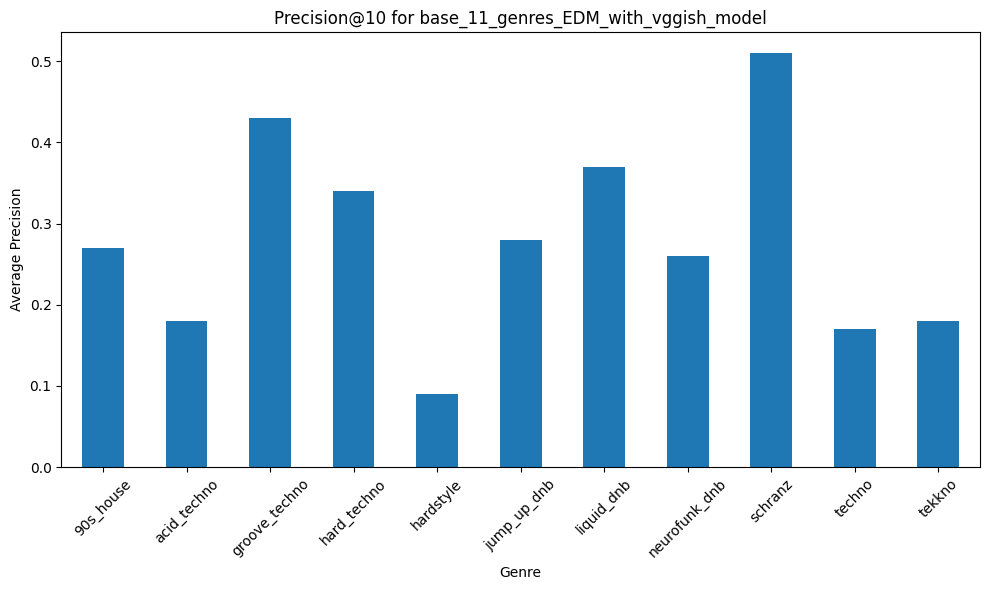

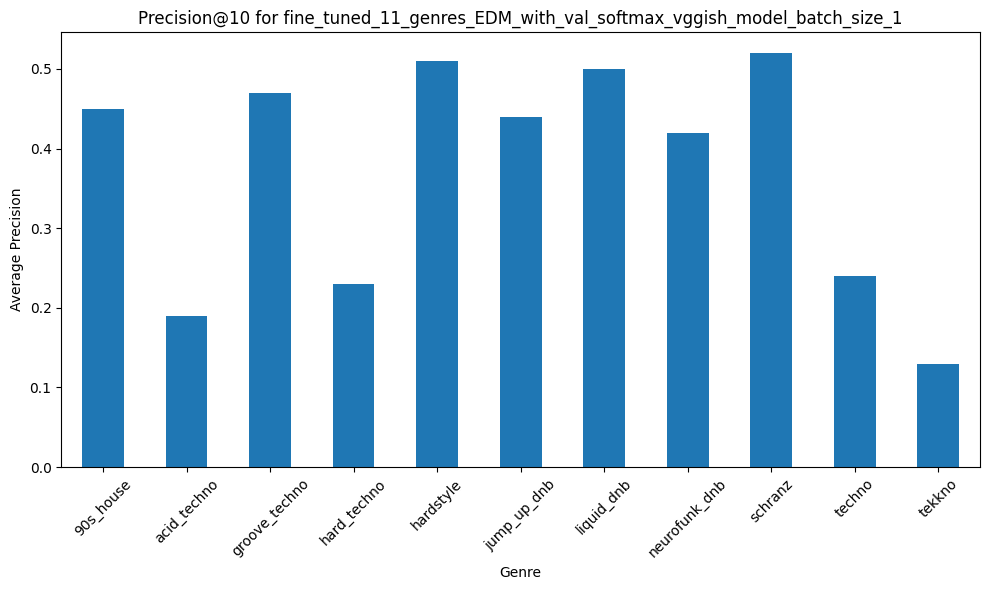

In [18]:
# Plot histograms for each collection
for collection in collections:
    plt.figure(figsize=(10, 6))
    subset = evaluation_scores_df[evaluation_scores_df['collection'] == collection]
    subset.groupby('genre')['precision'].mean().plot(kind='bar')
    plt.title(f'Precision@{k} for {collection}')
    plt.xlabel('Genre')
    plt.ylabel('Average Precision')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Processing songs: 100%|██████████| 844/844 [00:20<00:00, 40.59it/s]


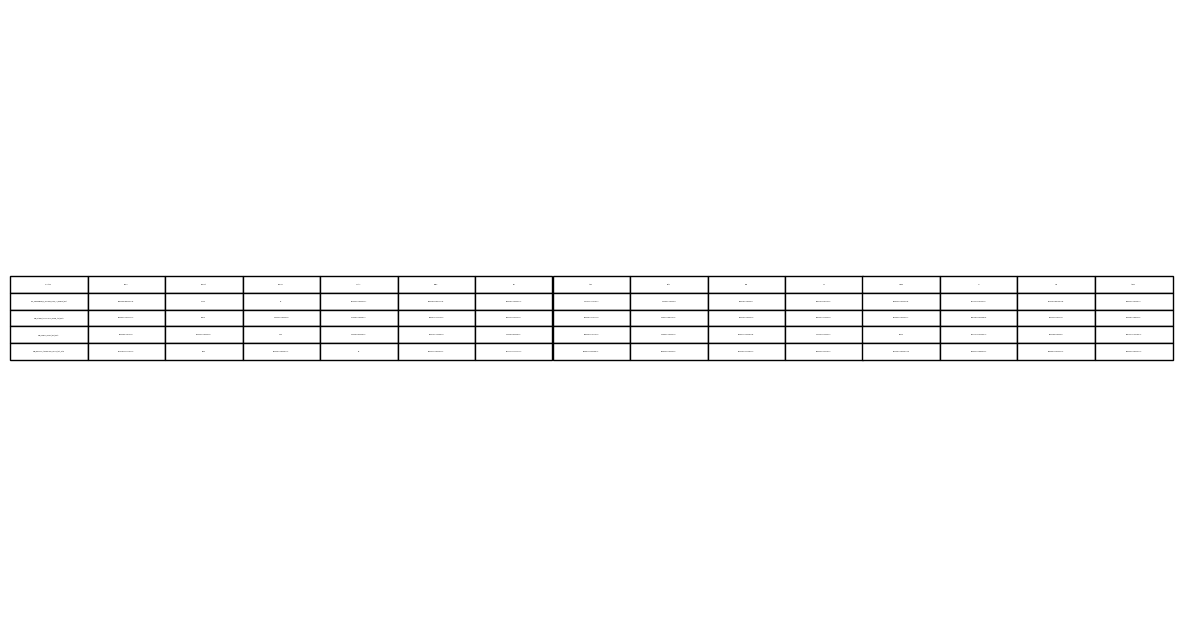

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from qdrant_client import QdrantClient

# Initialize the Qdrant client
client = QdrantClient(url="http://localhost:6333")

# Load the DataFrame
df = pd.read_csv('test_set_final_13main_59sub_genres.csv')

# Number of top results to evaluate
k = 10

# Define a function to calculate precision at k
def calculate_precision_at_k(results, first_genre, k):
    relevant_results = [point for point in results.points if point.payload['main_genre'] == first_genre]
    return len(relevant_results) / k

# Add new columns to store precision values for each collection
collections = [
    'base_open3l_model_test_data','base_wav2vec_transformer_model_test_data','base_PANNs_transformer_model_test_data', 'VGG_embeddings_8_seconds_base_13_genres_test'
]

for collection in collections:
    df[f'precision_at_k_{collection}'] = 0.0

# Dictionary to store precision values for each genre and collection
genre_precisions = {collection: {} for collection in collections}

# Iterate over each row in the DataFrame
for index in tqdm(range(len(df)), desc="Processing songs"):
    first_genre = df.loc[index, 'main_genre']

    for collection in collections:
        response = client.query_points(
            collection_name=collection,
            query=index,
            limit=k
        )
        precision = calculate_precision_at_k(response, first_genre, k)

        # Append precision to the DataFrame
        df.at[index, f'precision_at_k_{collection}'] = precision

        if first_genre not in genre_precisions[collection]:
            genre_precisions[collection][first_genre] = []
        genre_precisions[collection][first_genre].append(precision)

# Calculate average precision for each genre and collection
average_precisions = {
    collection: {genre: sum(precisions) / len(precisions) for genre, precisions in genre_precisions[collection].items()}
    for collection in collections
}

# Calculate overall precision for each collection
overall_precisions = {
    collection: sum([sum(precisions) for precisions in genre_precisions[collection].values()]) / sum([len(precisions) for precisions in genre_precisions[collection].values()])
    for collection in collections
}

# Create a summary DataFrame for average precision and overall precision
summary_data = []
for collection in collections:
    for genre, avg_precision in average_precisions[collection].items():
        summary_data.append({
            'Collection': collection,
            'Genre': genre,
            'Average Precision@10': avg_precision
        })
    summary_data.append({
        'Collection': collection,
        'Genre': 'Overall',
        'Average Precision@10': overall_precisions[collection]
    })

summary_df = pd.DataFrame(summary_data)

# Pivot the DataFrame to get the desired structure
pivot_df = summary_df.pivot(index='Collection', columns='Genre', values='Average Precision@10').reset_index()

# Plot the table
fig, ax = plt.subplots(figsize=(15, 8))  # set size frame
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=pivot_df.values, colLabels=pivot_df.columns, cellLoc='center', loc='center')

# Save the table as an image
plt.savefig('precision_table.png', bbox_inches='tight', dpi=300)

# Show the table
plt.show()

In [7]:
evaluation_scores_df

,collection,genre,precision
0,openl3_embeddings_8_seconds,k-pop,0.2
1,openl3_embeddings_8_seconds,k-pop,0.4
2,openl3_embeddings_8_seconds,k-pop,0.0
3,openl3_embeddings_8_seconds,k-pop,0.4
4,openl3_embeddings_8_seconds,k-pop,0.4
...,...,...,...
17255,VGG_embeddings_8_seconds,cumbia sonidera,0.2
17256,VGG_embeddings_8_seconds,cumbia sonidera,0.2
17257,VGG_embeddings_8_seconds,cumbia sonidera,0.0
17258,VGG_embeddings_8_seconds,cumbia sonidera,0.4


In [3]:
# Print the overall precision for each collection
for collection, overall_precision in overall_precisions.items():
    print(f"Overall Average Precision@{k} for {collection}: {overall_precision}")

Overall Average Precision@10 for base_open3l_model_test_data: 0.405568720379147
Overall Average Precision@10 for base_wav2vec_transformer_model_test_data: 0.21516587677725119
Overall Average Precision@10 for base_PANNs_transformer_model_test_data: 0.45983412322274886
Overall Average Precision@10 for VGG_embeddings_8_seconds_base_13_genres_test: 0.48293838862559235


In [4]:
# Find the top 5 best genres with their average precision for each collection
top_n = 5

for collection in collections:
    sorted_genres = sorted(average_precisions[collection].items(), key=lambda item: item[1], reverse=True)[:top_n]
    print(f"Top {top_n} genres for {collection}:")
    for genre, avg_precision in sorted_genres:
        print(f"  Genre: {genre}, Average Precision@{k}: {avg_precision}")

Top 5 genres for base_open3l_model_test_data:
  Genre: ambient, Average Precision@10: 0.7299999999999998
  Genre: classical, Average Precision@10: 0.565
  Genre: dnb, Average Precision@10: 0.5555555555555555
  Genre: metal, Average Precision@10: 0.5488095238095239
  Genre: country, Average Precision@10: 0.5455555555555555
Top 5 genres for base_wav2vec_transformer_model_test_data:
  Genre: metal, Average Precision@10: 0.4083333333333332
  Genre: rap, Average Precision@10: 0.3290697674418606
  Genre: techno, Average Precision@10: 0.32063492063492066
  Genre: country, Average Precision@10: 0.2
  Genre: latino, Average Precision@10: 0.19887640449438204
Top 5 genres for base_PANNs_transformer_model_test_data:
  Genre: ambient, Average Precision@10: 0.7875
  Genre: techno, Average Precision@10: 0.7396825396825397
  Genre: dnb, Average Precision@10: 0.6444444444444444
  Genre: rap, Average Precision@10: 0.6046511627906974
  Genre: country, Average Precision@10: 0.5766666666666669
Top 5 genres